<a href="https://colab.research.google.com/github/robertomoragad/Estadistica/blob/master/Ajuste_de_distribuci%C3%B3n_de_probabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ajuste de distribución de probabilidad

Analizar el dataset de 100 datos de la variable 'tiempo de espera' que es experimentada por los clientes en las cajas de un importante Supermercado.

1) Indicar cual es la mejor distribución estádistica que se ajusta la distribución empírica producida por el dataset.

2) Concluir sobre el test estadístico que se utiliza para seleccionar
la distribución teórica.

3) Indicar los parametros de la distribución teórica.

4) Simular un universo de un millón de datos, gráficar y comparar con la distribución empírica.



In [2]:
data = [0.44945126, 5.2590738, 0.28167967, 0.72323018, 3.11365869, 0.52347752, 3.83136359, 4.82181318, 2.46809553, 9.06440676, 1.97792349, 2.29167921, 7.64311562, 5.3927363, 2.88164336, 1.24519897, 3.87755012, 2.66893171, 6.61958068, 4.01343879, 0.92806589, 1.88542597, 16.26992571, 2.82897633, 1.76865956, 4.64981083, 3.44977119, 3.70810781, 0.40869652, 1.70597353, 1.60481539, 4.3888313, 0.66401549, 5.97789329, 4.42888943, 5.49045846, 2.57259244, 2.14667511, 7.94527437, 7.53019147, 4.81260632, 1.53984552, 5.55717916, 5.57189152, 0.29384042, 5.19379694, 1.50024494, 2.79898598, 0.1197735, 3.55842118, 2.11502917, 3.25655553, 13.589329, 4.28806846, 4.69983509, 2.61883495, 14.51182923, 1.32449317, 10.3923905, 0.79501069, 8.29195936, 1.44029325, 1.73171547, 0.77666469, 3.25759707, 5.07468116, 1.90913549, 4.21134763, 2.61312695, 1.34549856, 0.48520484, 0.47406398, 5.56741607, 2.50014463, 2.5703436, 7.51968496, 1.94204423, 3.24679051, 2.77281025, 2.64330727, 3.85810225, 1.00439797, 0.6627136, 2.11164986, 1.30235165, 6.79125223, 5.93978268, 0.6337219, 0.19580381, 4.52672021, 7.46807689, 1.79054137, 1.33192098, 1.81749536, 2.18929704, 1.98826255, 3.45042869, 1.20160934, 0.39776, 1.3957078]

In [1]:
#cargar librerias

from scipy import stats

import numpy as np
import matplotlib.pyplot as plt

Para determinar la mejor distribución estadística que se ajusta a los datos del dataset de 100 datos de la variable 'tiempo de espera', podemos realizar un análisis exploratorio de los datos y ajustar diferentes distribuciones para encontrar la que mejor se ajuste.

Primero, vamos a graficar un histograma de los datos para tener una idea visual de su distribución:

Media =  3.4847048594000007
Sigma =  2.9957141940486403


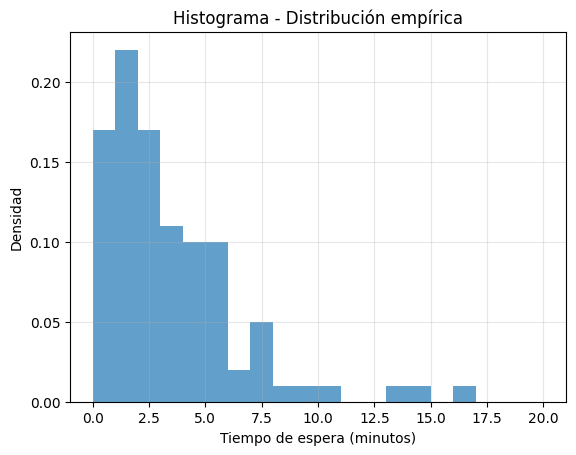

In [5]:
#Calcular estadísticos
media = np.mean(data)
sigma = np.std(data)
print('Media = ', media)
print('Sigma = ', sigma)

# Graficar el histograma de los datos
plt.hist(data, bins=20, density=True, alpha=0.7, range=(0, 20))
plt.xlabel('Tiempo de espera (minutos)')
plt.ylabel('Densidad')
plt.title('Histograma - Distribución empírica')
plt.grid(True, alpha=0.3)
plt.show()

Podemos observar que la distribución es asimétrica, con un sesgo positivo.  Se podría evaluar un ajuste con la distribución Exponencial y Gamma.

A continuación, podemos ajustar ambas distribuciones a los datos y comparar su ajuste utilizando el test de bondad de ajuste de Kolmogorov-Smirnov. Este test compara la distribución empírica de los datos con la distribución teórica ajustada y nos da una medida de qué tan bien se ajusta la distribución teórica a los datos. También incluiremos la distribución Normal para demostrar su baja capacidad de ajuste a la distribución empírica.

In [6]:
#Test de bondad de ajuste Kolmogorov-Smirnov
# Ajuste de distribución exponencial
params_exp = stats.expon.fit(data)
ks_exp = stats.kstest(data, 'expon', params_exp)

# Ajuste de distribución gamma
params_gamma = stats.gamma.fit(data)
ks_gamma = stats.kstest(data, 'gamma', params_gamma)

# Ajuste de distribución normal
params_normal = stats.norm.fit(data)
ks_normal = stats.kstest(data, 'norm', params_normal)


print("Resultados del test de Kolmogorov-Smirnov:")
print("Distribución exponencial: D =", ks_exp.statistic, ", p-value =", ks_exp.pvalue)
print("Distribución gamma: D =", ks_gamma.statistic, ", p-value =", ks_gamma.pvalue)
print("Distribución normal: D =", ks_normal.statistic, ", p-value =", ks_normal.pvalue)

Resultados del test de Kolmogorov-Smirnov:
Distribución exponencial: D = 0.09632732632704222 , p-value = 0.2923806469743825
Distribución gamma: D = 0.04945527456686716 , p-value = 0.9572154214571448
Distribución normal: D = 0.13977116100908749 , p-value = 0.036295468063189236


Los resultados del test de Kolmogorov-Smirnov nos indican qué tan bien se ajusta cada distribución a los datos. Un p-value alto indica que la distribución teórica se ajusta bien a los datos, mientras que un p-value bajo indica que la distribución teórica no se ajusta bien.

Los resultados del test nos indican que la distribución Gamma se ajusta mejor a los datos, ya que tiene un p-value más alto que la distribución Exponencial y Normal.

Los parámetros de la distribución gamma se obtienen mediante el ajuste a los datos y se pueden utilizar para generar muestras de la distribución ajustada.

In [7]:
#calculo de parametros Gamma
print(params_gamma)

(1.261870501625813, 0.10333147711257643, 2.679615008624273)


Con estos parámetros simularemos un universo de un millón de datos.

media simulación = 3.4812943551061175
sigma simulación = 3.0011079304838524


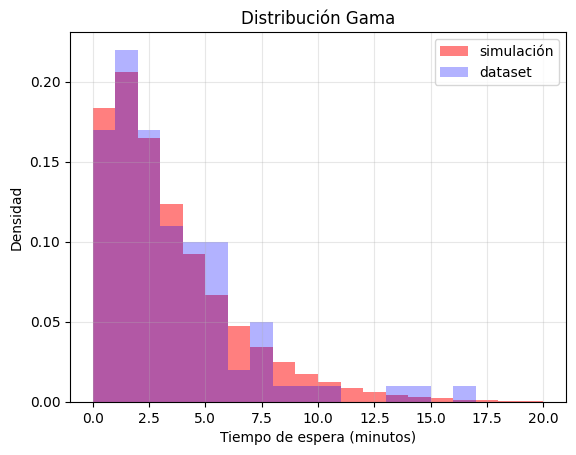

In [25]:
simulacion = stats.gamma.rvs(a=1.2618, loc=0.1033, scale=2.6796, size=1000000, random_state=None)

print('media simulación =', np.mean(simulacion))
print('sigma simulación =', np.std(simulacion))

# Graficar el histograma de los datos
plt.hist(simulacion, bins=20, density=True, alpha=0.5, color='r', range=(0, 20), label="simulación")
plt.hist(data, bins=20, density=True, alpha=0.3, color='b', range=(0, 20), label="dataset")
plt.xlabel('Tiempo de espera (minutos)')
plt.ylabel('Densidad')
plt.title('Distribución Gama')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

La gráfica nos permite observar un buen ajuste de la distribución empírica con la distribución Gamma simulada. A nivel de parámetros Media y Sigma, la muestra empírica y la simulada están muy cercanos.